In [1]:
pip install kagglehub

In [2]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mondejar/mitbih-database")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\shree\.cache\kagglehub\datasets\mondejar\mitbih-database\versions\2


In [4]:
print(os.listdir(path))
print("Dataset path",path)

['100.csv', '100annotations.txt', '101.csv', '101annotations.txt', '102.csv', '102annotations.txt', '103.csv', '103annotations.txt', '104.csv', '104annotations.txt', '105.csv', '105annotations.txt', '106.csv', '106annotations.txt', '107.csv', '107annotations.txt', '108.csv', '108annotations.txt', '109.csv', '109annotations.txt', '111.csv', '111annotations.txt', '112.csv', '112annotations.txt', '113.csv', '113annotations.txt', '114.csv', '114annotations.txt', '115.csv', '115annotations.txt', '116.csv', '116annotations.txt', '117.csv', '117annotations.txt', '118.csv', '118annotations.txt', '119.csv', '119annotations.txt', '121.csv', '121annotations.txt', '122.csv', '122annotations.txt', '123.csv', '123annotations.txt', '124.csv', '124annotations.txt', '200.csv', '200annotations.txt', '201.csv', '201annotations.txt', '202.csv', '202annotations.txt', '203.csv', '203annotations.txt', '205.csv', '205annotations.txt', '207.csv', '207annotations.txt', '208.csv', '208annotations.txt', '209.csv'

In [5]:
import pandas as pd

df = pd.read_csv(os.path.join(path, "101.csv"))
print(df.columns)


Index([''sample #'', ''MLII'', ''V1''], dtype='object')


In [6]:
label_map = {

    'N': 0,  # Normal
    'L': 0,  #Left bundle branch block beat
    'R': 0, #Right bundle branch block beat
    'e': 0,  #Atrial escape beat
    'j': 0,  #Nodal (junctional) escape beat

    'A': 1,  # Supraventricular
    'a': 1,
    'J': 1,
    'S': 1,

    'V': 2,  # Ventricular
    'E': 2,

    'F': 3,  # Fusion

    'Q': 4   # Unknown / paced
}

In [7]:
X_all = []
y_all = []

WINDOW = 180

In [8]:
import csv

In [9]:
for file in os.listdir(path):
    if not file.endswith(".csv"):
        continue
    record_id = file.replace(".csv","")
    csv_path = os.path.join(path,file)
    ann_path = os.path.join(path, record_id + "annotations.txt")

    if not os.path.exists(ann_path):
        continue

    print(f"Processing record {record_id}")

    df = pd.read_csv(csv_path, header=None,names=['sample','MLII','V1']
    ,engine="python",
    quoting=csv.QUOTE_NONE,
    on_bad_lines="skip")

    signal = df["MLII"].to_numpy()

    annotations = pd.read_csv(ann_path,
    delim_whitespace=True,
    skiprows=1,
    header=None,
    names = ['time','sample','symbol','sub','chan','num','aux'],
    engine="python",
    quoting=csv.QUOTE_NONE,
    on_bad_lines="skip")



Processing record 100


C:\Users\shree\AppData\Local\Temp\ipykernel_21744\3371253273.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  annotations = pd.read_csv(ann_path,


Processing record 101


C:\Users\shree\AppData\Local\Temp\ipykernel_21744\3371253273.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  annotations = pd.read_csv(ann_path,


Processing record 102


C:\Users\shree\AppData\Local\Temp\ipykernel_21744\3371253273.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  annotations = pd.read_csv(ann_path,


Processing record 103


C:\Users\shree\AppData\Local\Temp\ipykernel_21744\3371253273.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  annotations = pd.read_csv(ann_path,


Processing record 104


C:\Users\shree\AppData\Local\Temp\ipykernel_21744\3371253273.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  annotations = pd.read_csv(ann_path,


Processing record 105


C:\Users\shree\AppData\Local\Temp\ipykernel_21744\3371253273.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  annotations = pd.read_csv(ann_path,


Processing record 106


C:\Users\shree\AppData\Local\Temp\ipykernel_21744\3371253273.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  annotations = pd.read_csv(ann_path,


Processing record 107


C:\Users\shree\AppData\Local\Temp\ipykernel_21744\3371253273.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  annotations = pd.read_csv(ann_path,


Processing record 108


C:\Users\shree\AppData\Local\Temp\ipykernel_21744\3371253273.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  annotations = pd.read_csv(ann_path,


Processing record 109


C:\Users\shree\AppData\Local\Temp\ipykernel_21744\3371253273.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  annotations = pd.read_csv(ann_path,


Processing record 111


C:\Users\shree\AppData\Local\Temp\ipykernel_21744\3371253273.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  annotations = pd.read_csv(ann_path,


Processing record 112


C:\Users\shree\AppData\Local\Temp\ipykernel_21744\3371253273.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  annotations = pd.read_csv(ann_path,


Processing record 113


C:\Users\shree\AppData\Local\Temp\ipykernel_21744\3371253273.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  annotations = pd.read_csv(ann_path,


Processing record 114


C:\Users\shree\AppData\Local\Temp\ipykernel_21744\3371253273.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  annotations = pd.read_csv(ann_path,


Processing record 115


C:\Users\shree\AppData\Local\Temp\ipykernel_21744\3371253273.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  annotations = pd.read_csv(ann_path,


Processing record 116


C:\Users\shree\AppData\Local\Temp\ipykernel_21744\3371253273.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  annotations = pd.read_csv(ann_path,


Processing record 117


C:\Users\shree\AppData\Local\Temp\ipykernel_21744\3371253273.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  annotations = pd.read_csv(ann_path,


Processing record 118


C:\Users\shree\AppData\Local\Temp\ipykernel_21744\3371253273.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  annotations = pd.read_csv(ann_path,


Processing record 119


C:\Users\shree\AppData\Local\Temp\ipykernel_21744\3371253273.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  annotations = pd.read_csv(ann_path,


Processing record 121


C:\Users\shree\AppData\Local\Temp\ipykernel_21744\3371253273.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  annotations = pd.read_csv(ann_path,


Processing record 122


C:\Users\shree\AppData\Local\Temp\ipykernel_21744\3371253273.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  annotations = pd.read_csv(ann_path,


Processing record 123


C:\Users\shree\AppData\Local\Temp\ipykernel_21744\3371253273.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  annotations = pd.read_csv(ann_path,


Processing record 124


C:\Users\shree\AppData\Local\Temp\ipykernel_21744\3371253273.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  annotations = pd.read_csv(ann_path,


Processing record 200


C:\Users\shree\AppData\Local\Temp\ipykernel_21744\3371253273.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  annotations = pd.read_csv(ann_path,


Processing record 201


C:\Users\shree\AppData\Local\Temp\ipykernel_21744\3371253273.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  annotations = pd.read_csv(ann_path,


Processing record 202


C:\Users\shree\AppData\Local\Temp\ipykernel_21744\3371253273.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  annotations = pd.read_csv(ann_path,


Processing record 203


C:\Users\shree\AppData\Local\Temp\ipykernel_21744\3371253273.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  annotations = pd.read_csv(ann_path,


Processing record 205


C:\Users\shree\AppData\Local\Temp\ipykernel_21744\3371253273.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  annotations = pd.read_csv(ann_path,


Processing record 207


C:\Users\shree\AppData\Local\Temp\ipykernel_21744\3371253273.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  annotations = pd.read_csv(ann_path,


Processing record 208


C:\Users\shree\AppData\Local\Temp\ipykernel_21744\3371253273.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  annotations = pd.read_csv(ann_path,


Processing record 209


C:\Users\shree\AppData\Local\Temp\ipykernel_21744\3371253273.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  annotations = pd.read_csv(ann_path,


Processing record 210


C:\Users\shree\AppData\Local\Temp\ipykernel_21744\3371253273.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  annotations = pd.read_csv(ann_path,


Processing record 212


C:\Users\shree\AppData\Local\Temp\ipykernel_21744\3371253273.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  annotations = pd.read_csv(ann_path,


Processing record 213


C:\Users\shree\AppData\Local\Temp\ipykernel_21744\3371253273.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  annotations = pd.read_csv(ann_path,


Processing record 214


C:\Users\shree\AppData\Local\Temp\ipykernel_21744\3371253273.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  annotations = pd.read_csv(ann_path,


Processing record 215


C:\Users\shree\AppData\Local\Temp\ipykernel_21744\3371253273.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  annotations = pd.read_csv(ann_path,


Processing record 217


C:\Users\shree\AppData\Local\Temp\ipykernel_21744\3371253273.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  annotations = pd.read_csv(ann_path,


Processing record 219


C:\Users\shree\AppData\Local\Temp\ipykernel_21744\3371253273.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  annotations = pd.read_csv(ann_path,


Processing record 220


C:\Users\shree\AppData\Local\Temp\ipykernel_21744\3371253273.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  annotations = pd.read_csv(ann_path,


Processing record 221


C:\Users\shree\AppData\Local\Temp\ipykernel_21744\3371253273.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  annotations = pd.read_csv(ann_path,


Processing record 222


C:\Users\shree\AppData\Local\Temp\ipykernel_21744\3371253273.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  annotations = pd.read_csv(ann_path,


Processing record 223


C:\Users\shree\AppData\Local\Temp\ipykernel_21744\3371253273.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  annotations = pd.read_csv(ann_path,


Processing record 228


C:\Users\shree\AppData\Local\Temp\ipykernel_21744\3371253273.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  annotations = pd.read_csv(ann_path,


Processing record 230


C:\Users\shree\AppData\Local\Temp\ipykernel_21744\3371253273.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  annotations = pd.read_csv(ann_path,


Processing record 231


C:\Users\shree\AppData\Local\Temp\ipykernel_21744\3371253273.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  annotations = pd.read_csv(ann_path,


Processing record 232


C:\Users\shree\AppData\Local\Temp\ipykernel_21744\3371253273.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  annotations = pd.read_csv(ann_path,


Processing record 233


C:\Users\shree\AppData\Local\Temp\ipykernel_21744\3371253273.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  annotations = pd.read_csv(ann_path,


Processing record 234


C:\Users\shree\AppData\Local\Temp\ipykernel_21744\3371253273.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  annotations = pd.read_csv(ann_path,


In [10]:
for _,row in annotations.iterrows():
    position = int(row['sample'])
    symbol = row['symbol']

    if symbol not in label_map:
        continue

    if position -WINDOW <0 or position + WINDOW >= len(signal):
        continue

    beat = signal[position - WINDOW : position + WINDOW]
    X_all.append(beat)
    y_all.append(label_map[symbol])

In [11]:
X_all = np.array(X_all)
y_all = np.array(y_all)

print("Total beats: ",X_all.shape)
print("Labels: ", np.unique(y_all, return_counts=True))

Total beats:  (2752, 360)
Labels:  (array([0, 1, 2]), array([2699,   50,    3]))


In [12]:
X_train,X_test,y_train,y_test = train_test_split(
    X_all,
    y_all,
    test_size = 0.30,
    random_state = 42,
    stratify=y_all
)

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
rf_clf = RandomForestClassifier(
    n_estimators=200,
    max_depth = None,
    random_state=42,
    n_jobs=-1,
)

rf_clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [15]:
y_pred = rf_clf.predict(X_test)

In [16]:
RF_acc = accuracy_score(y_pred,y_test)

print("Accuracy of RF Model", RF_acc*100)

Accuracy of RF Model 99.27360774818402


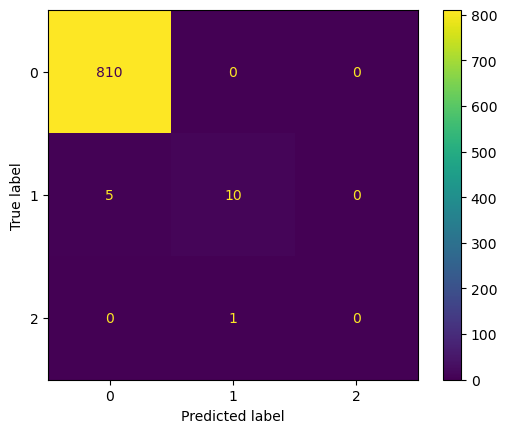

In [17]:
#confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()